## Predicting Heart Disease

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('heart_disease_prediction.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
data.shape

(918, 12)

In [3]:
#checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
#checking the null values
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## EDA: Descriptive Statistics


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


When examining the data, we observe that the average age of the patients is 53 years old, with some columns having outliers. For example, for an average cholesterol value of 200, the maximum value is 600 or for an average oldpeak value of 0.88, the maximum is 6.2.

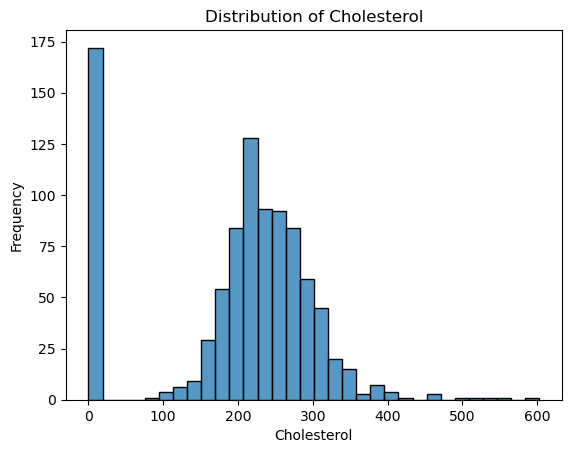

In [6]:
sns.histplot(data['Cholesterol'])
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

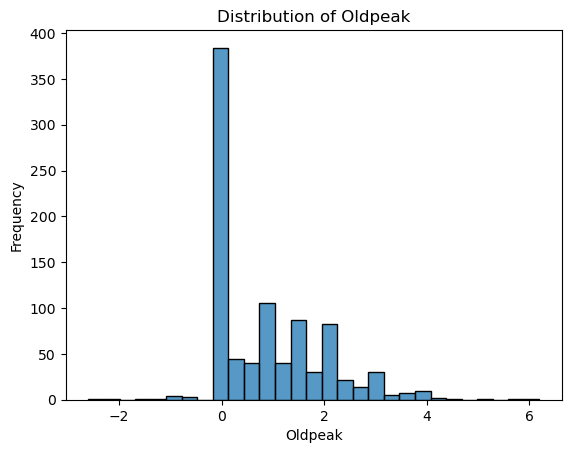

In [7]:
sns.histplot(data['Oldpeak'])
plt.title('Distribution of Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()

As can be seen from the graphs, there are a large number of zero or close to zero values in both cases
In case of ```Oldpeak``` there are negative value

A couple of observations stand out. RestingBP is the resting blood pressure, and it's unlikely to be zero. But what about Cholesterol? Low cholesterol certainly sounds like a good thing, but can it be zero?

This is where domain expertise can help us. Since we might not be suited to answer the question, we could reach out to a subject matter expert or research it on our own.

As per the dataset description, Cholesterol contains the serum cholesterol values. And per the American Heart Association, serum cholesterol:

* *is a composite of different measurements. Your total blood cholesterol is calculated by adding your HDL and LDL cholesterol levels, plus 20% of your triglyceride level.*

The above information is enough to let us know that a 0 value for serum cholesterol is unlikely.

## EDA: Visualizations

create a bar chart for ```HeartDisease```

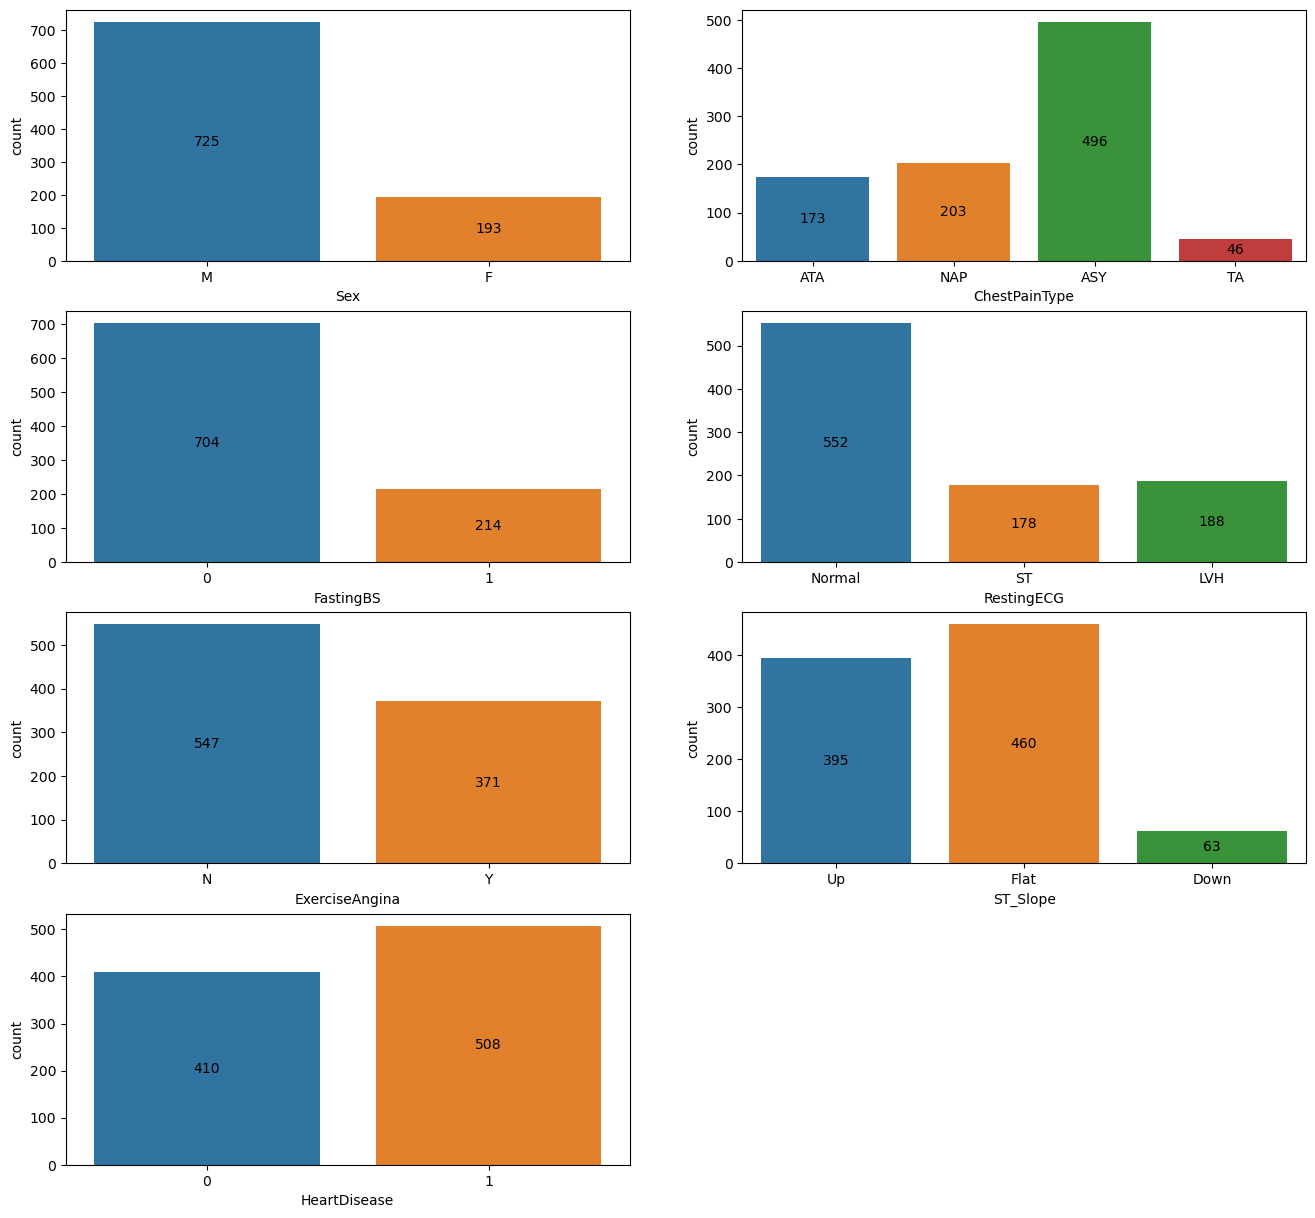

In [8]:
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=data[col], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

* The dataset is highly skewed towards male patients. There are 725 male patients and 193 female patients. This could potentially induce a bias in our model.
* 496 patients had ASY (asymptotic) chest pain type.
* 552 patients had a normal restin ECG.
* 704 patients had blood sugar lower than 120 mg/dl

Grouping these by HeartDisease will give us a better idea about the data distribution.

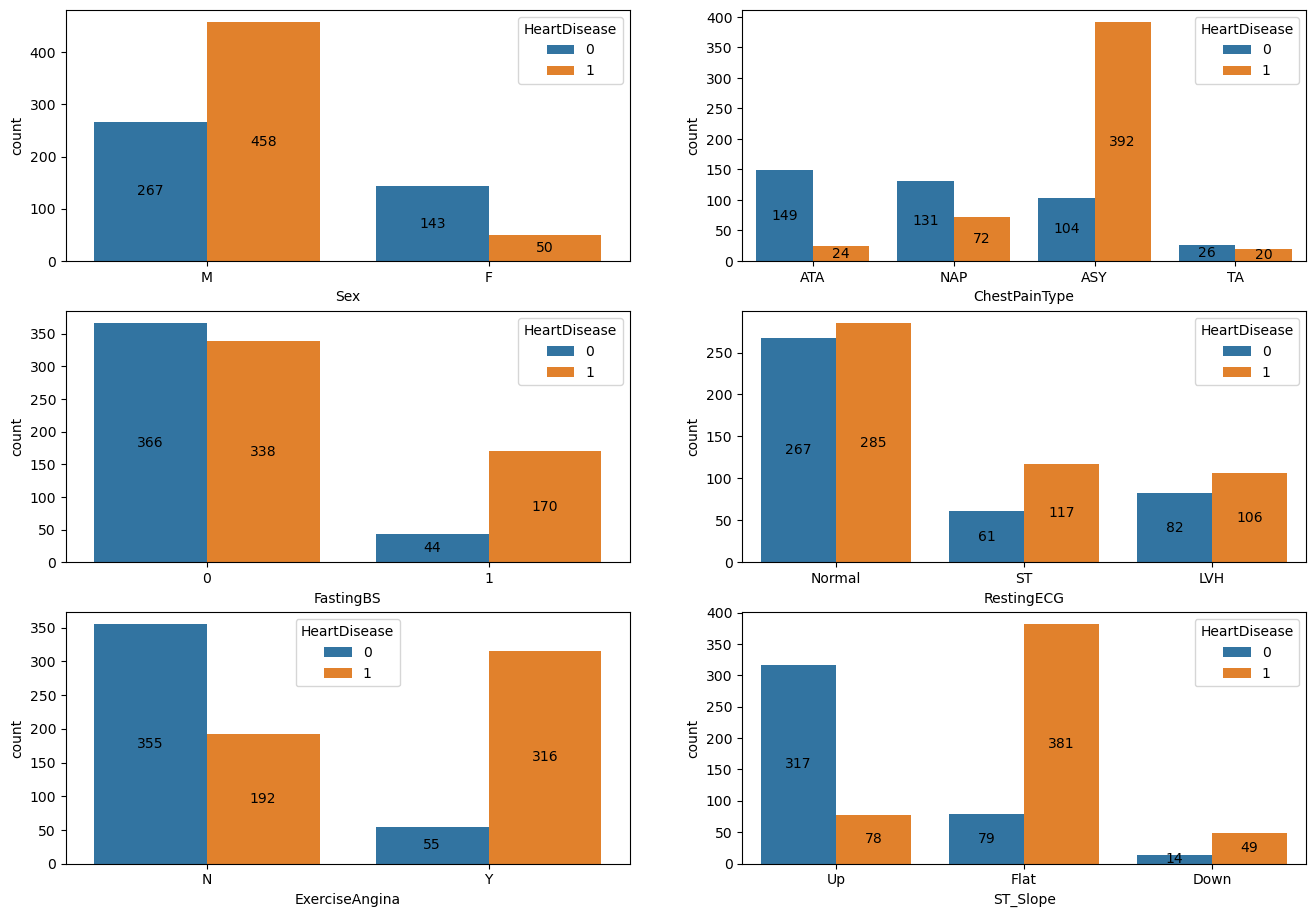

In [9]:
fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols[:-1]):
    ax = plt.subplot(4, 2, idx+1)
    # group by HeartDisease
    sns.countplot(x=data[col], hue=data["HeartDisease"], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

## Data Cleaning

In [10]:
data[data['RestingBP']==0]['RestingBP'].value_counts(ascending=True)

0    1
Name: RestingBP, dtype: int64

In [11]:
data[data['Cholesterol']==0]['Cholesterol'].value_counts(ascending=True)

0    172
Name: Cholesterol, dtype: int64

In [12]:
index_rest = data.index[data['RestingBP'] == '0']

In [13]:
mean_rest_by_heart = data.groupby('HeartDisease')['RestingBP'].mean()

In [14]:
data.loc[449, 'RestingBP'] = mean_rest_by_heart[0]

Only one row in the ```restingBP``` had a zero value, it was decided to replace it with the average value of this column grouped by ```HeartDisease```

While the ```cholesterol``` column has 172 null values and it is possible to apply replacement by age, sex, etc.

In [15]:
#grouped by age
mean_ch_by_age = data.groupby('Age')['Cholesterol'].mean()
mean_ch_by_age

Age
28    132.000000
29    236.666667
30    237.000000
31    244.500000
32    241.200000
33    272.000000
34    163.285714
35    197.454545
36    190.333333
37    233.727273
38    146.500000
39    239.200000
40    229.384615
41    216.500000
42    212.222222
43    202.333333
44    249.578947
45    229.333333
46    217.166667
47    193.421053
48    228.193548
49    213.476190
50    199.200000
51    175.885714
52    200.277778
53    181.030303
54    231.980392
55    218.463415
56    174.789474
57    202.315789
58    217.285714
59    175.714286
60    167.656250
61    162.580645
62    166.742857
63    157.600000
64    205.318182
65    207.571429
66    179.461538
67    254.866667
68    158.500000
69    156.230769
70    171.714286
71    231.600000
72    137.000000
73      0.000000
74    184.285714
75    246.000000
76    155.000000
77    237.500000
Name: Cholesterol, dtype: float64

In [16]:
data[data['Cholesterol'] == 0]['Age'].value_counts()

61    12
63    11
56    10
60    10
53    10
62    10
51     9
59     9
57     7
38     6
52     6
55     6
58     6
64     5
65     5
50     4
54     4
69     4
47     4
43     4
68     3
66     3
70     2
67     2
48     2
74     2
40     2
42     2
46     2
41     2
72     1
45     1
36     1
32     1
73     1
34     1
35     1
49     1
Name: Age, dtype: int64

In [17]:
def age_group(row):
    if row['Age'] < 40:
        return '30s'
    if 39 < row['Age']< 50:
        return '40s'
    if 49 < row['Age'] < 60:
        return '50s'
    if row['Age'] > 59:
        return '60+'
data['Age_ordinal'] = data.apply(age_group, axis=1)
    

In [18]:
mean_ch_by_age = data.groupby('Age_ordinal')['Cholesterol'].mean()
mean_ch_by_age                           

Age_ordinal
30s    203.475000
40s    218.805687
50s    199.770053
60+    179.201581
Name: Cholesterol, dtype: float64

In [19]:
data.loc[(data['Cholesterol']==0) & (data['Age_ordinal']=='30s'), 'Cholesterol'] = mean_ch_by_age[0]
data.loc[(data['Cholesterol']==0) & (data['Age_ordinal']=='40s'), 'Cholesterol'] = mean_ch_by_age[1]
data.loc[(data['Cholesterol']==0) & (data['Age_ordinal']=='50s'), 'Cholesterol'] = mean_ch_by_age[2]
data.loc[(data['Cholesterol']==0) & (data['Age_ordinal']=='60s'), 'Cholesterol'] = mean_ch_by_age[3]

We replaced the null values in the cholesterol column with mean values grouped by age

## Feature Selection
Now that we've cleaned our data, we can select features for our model. Thanks to our EDA and a general understanding of the features, we can identify some of the features that we could start with:

* ```Age```
* ```Sex```
* ```ChestPainType```
* ```Cholesterol```
* ```FastingBS```

In [20]:
data= data.drop('Age_ordinal', axis=1)

In [21]:
data = pd.get_dummies(data=data, drop_first=True)
data 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160.0,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138.0,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150.0,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144.0,193.0,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130.0,131.0,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130.0,236.0,0,174,0.0,1,0,1,0,0,0,0,0,1,0


<AxesSubplot:>

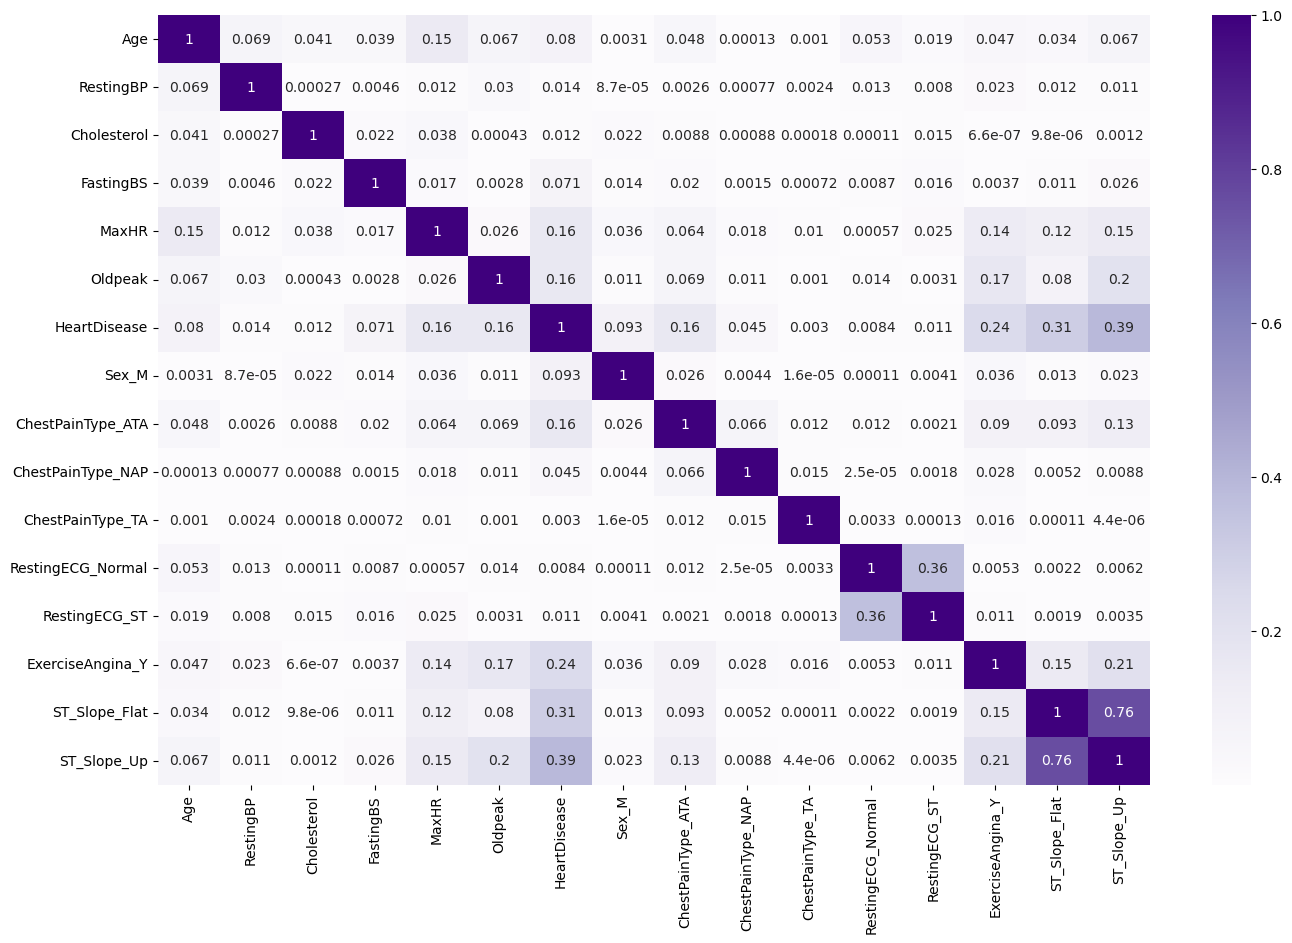

In [22]:
import seaborn as sns
plt.figure(figsize=(16,10))
correlations = data.corr()**2
sns.heatmap(correlations, annot=True, cmap = 'Purples')

When we use the Pearson squared coefficient, we have fewer parameters to choose from because the correlation between values is squared less than the correlation between values.
Let's use the standard Pearson coefficient

In [23]:
correlations_abs = abs(data.corr())
top_feature = correlations_abs['HeartDisease'].sort_values(ascending=False)[1:6].index
top_feature

Index(['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'Oldpeak',
       'ChestPainType_ATA'],
      dtype='object')

##  Building a Classifier I
From our correlation heat map, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to HeartDisease:

* Oldpeak
We could also select MaxHR or ChestPainType_ATA.
* Sex_M
It has a relatively low value for the coefficient, but given what we observed in our EDA, let's also take it into account.
* ExerciseAngina_Y
* ST_Slope_Flat
* ST_Slope_Up

Surprisingly, ```Cholesterol``` is not strongly correlated to ```HeartDisease```. We can consider ignoring the feature for now.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state = 417)

In [41]:
top_features = ['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'Oldpeak',
       'ChestPainType_ATA', 'Sex_M']
for feature in top_features:
    knn = KNeighborsClassifier(n_neighbors = 7)
    knn.fit(X_train[[feature]], y_train)
    val_accuracy = knn.score(X_val[[feature]], y_val)
    print(f'Model accuracy for feature {feature} with k=7: {val_accuracy*100:.2f}')

Model accuracy for feature ST_Slope_Up with k=7: 82.07
Model accuracy for feature ST_Slope_Flat with k=7: 79.89
Model accuracy for feature ExerciseAngina_Y with k=7: 71.20
Model accuracy for feature Oldpeak with k=7: 70.11
Model accuracy for feature ChestPainType_ATA with k=7: 66.30
Model accuracy for feature Sex_M with k=7: 63.59


In [43]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[top_features])
X_val_scaled = scaler.transform(X_val[top_features])
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f'Model accuracy for chosen features on validation set: {accuracy*100:.2f}%')

Model accuracy for chosen features on validation set: 81.52%


Compared to the previous result, on average, the model's accuracy score increased. By normalizing the data, we were able to achieve greater accuracy.

  Our previous model using all of our selected and normalized features got an accuracy of ~82%! That's not a strong improvement on the model trained on just the ```ST_Slope_Flat``` feature, but it's a good start.
  
Now that we have a reasonably well-performing model, we can experiment with the parameters and hyperparameters. We'll use ```GridSearchCV``` to search over those values.

In [45]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 417)
X_train_scaled = scaler.fit_transform(X_train[top_features])
parameteres = grid_params = {"n_neighbors": range(1, 10),
                "metric": ["minkowski", "manhattan"],
                "p": range(1, 4)
              }
knn = KNeighborsClassifier()
clf = GridSearchCV(estimator=knn, param_grid = parameteres, scoring='accuracy')
clf.fit(X_train_scaled, y_train)
best_score = clf.best_score_
best_params = clf.best_params_

print(f"Best model's accuracy: {best_score*100:.2f}")
print(f"Best model's parameters: {best_params}")

Best model's accuracy: 84.74
Best model's parameters: {'metric': 'minkowski', 'n_neighbors': 8, 'p': 1}


Compared to the previous result, the accuracy of the model did not improve much. Up to about ```85%```

## Model Evaluation on Test Set

In [53]:
from sklearn.metrics import accuracy_score
X_test_scaled = scaler.transform(X_test[top_features])
predictions = clf.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 81.52


The accuracy rate on the test set was lower, it may be worth trying to change the sample size. Earlier we observed that more men were represented in the dataset and this may introduce bias.


In [55]:
X_test['Sex_M'].value_counts()

1    136
0     48
Name: Sex_M, dtype: int64

In [56]:
X_train['Sex_M'].value_counts()

1    589
0    145
Name: Sex_M, dtype: int64

* ```X``` had 725 males and 193 females.
* ```X_train``` had 589 males and 145 females.
* ```X_test``` had 136 males and 48 females.

The accuracy rate of the model is far from ideal. I would not recommend using this model in everyday practice to detect heart disease. Additional data may be needed to improve the model. Another oddity is that ```cholesterol``` does not correlate with cardiac morbidity. Since elevated ```cholesterol``` is a risk factor for disease. Also, the dataset is skewed toward male, which also introduces bias into the accuracy of the model.